In [1]:
import pandas as pd
import os
import platform
import sys
import mne
import base.base_constants as b_cs
if platform.system()=='Darwin':
    
    sys.path.append('/Users/leupinv/BBC/WP1/data/Code/python/BBC')
    os.chdir('/Volumes/BBC/BBC/WP1/data/EEG/tsk/')
    sys.path.append('/Users/leupinv/BBC/WP1/data/Code/python/BBC')



elif platform.system()=='Windows':
    os.chdir('Z:/BBC/WP1/data/EEG/tsk')

    sys.path.append('C:/Users/Vivi/switchdrive/BBC/WP1/data/Code/python/BBC')
    #os.chdir('c:/Users/Engi/all/BBC/WP1/data/EEG/tsk')
elif platform.system()=='Linux':
    os.chdir('/run/user/1000/gvfs/smb-share:server=bigdata,share=arts/Psycho/BBC/BBC/WP1/data/EEG/tsk'
             )
    #os.chdir('c:/Users/Engi/all/BBC/WP1/data/EEG/tsk')

import pingouin as pg
import seaborn as sns

import matplotlib.pyplot as plt



In [2]:
%load_ext autoreload


%autoreload 2

plt.style.use('default')
import matplotlib as mpl
plt.style.use('default')

mpl.rcParams['svg.fonttype']='none'
mpl.rcParams['text.usetex']=False

## Create behavioral dataframe 
using directly metadata from clean data

In [3]:
#Code to create behavioral dataframe using directly metadata from clean data
df_list=[]
#loop inside each epoch file and select metadata 
for g_n in b_cs.G_N:
    epo_df=mne.read_epochs(f'preproc/{g_n}/{g_n}_epochs/{g_n}_final/{g_n}_o_tsk_cfa_vep_clean_epo.fif', preload=True)
    
    epo_metadata=epo_df.metadata
    epo_metadata['g_num']=g_n
    df_list.append(epo_metadata)
df_conc=pd.concat(df_list)
df_conc

#saves
path='ana/behavioral/df_o_cleantrials.feather'
filename='/df_o_cleantrials.feather'
feather.write_dataframe(df_conc,path)

SyntaxError: unterminated string literal (detected at line 15) (4089780801.py, line 15)

## load dataframe
in case dataframe is already created use this to load it

In [4]:
path='ana/behavioral/df_o_cleantrials.feather'

In [5]:
df=pd.read_feather(path)

In [6]:
df.columns

Index(['TF', 'RT', 'difficulty', 'accuracy', 'awareness', 'cardiac_phase',
       'RRI', 'HeartRate', 'HeartRate_post', 'HeartRate_rolling_5_before',
       'HeartRate_rolling_5_centered', 'HeartRate_rolling_5_after',
       'HeartRateVar_rolling_10_centered', 'HeartRateVar_rolling_100_centered',
       'HeartRate_precedent', 'cardiac_peak', 'rsp_phase',
       'RSP_Rate_precedent', 'rsp_int', 'RSP_Rate', 'RSP_Rate_post',
       'RSP_Rate_rolling_5_before', 'RSP_Rate_rolling_5_centered',
       'RSP_Rate_rolling_5_after', 'RspRateVar_rolling_10_centered',
       'RspRateVar_rolling_100_centered', 'mrk_awa', 'mrk_card_awa',
       'mrk_rsp_awa', 'R_stim_int', 'inh_stim_int', 'mrk_card_awa_RR',
       'mrk_rsp_awa_RR', 'signal_type', 'sys_mask', 'stim_idx',
       'ECG_Phase_Completion_Ventricular', 'ECG_Phase_Completion_Atrial',
       'RSP_Phase_Completion', 'RSP_Amplitude', 'g_num'],
      dtype='object')

In [81]:
df['sys_mask']

2       1.0
6       0.0
10      0.0
14      1.0
18      1.0
       ... 
5837    1.0
5845    1.0
5849    1.0
5857    0.0
5861    1.0
Name: sys_mask, Length: 26711, dtype: float64

In [7]:
# fitler only normal trials and end of the diastole 
df=df[df['difficulty']== 'normal']

df=df[df['sys_mask']== 1]

In [8]:
df

,TF,RT,difficulty,accuracy,awareness,cardiac_phase,RRI,HeartRate,HeartRate_post,HeartRate_rolling_5_before,...,mrk_card_awa_RR,mrk_rsp_awa_RR,signal_type,sys_mask,stim_idx,ECG_Phase_Completion_Ventricular,ECG_Phase_Completion_Atrial,RSP_Phase_Completion,RSP_Amplitude,g_num
2,8944,1625.789062,normal,mistake,unaware,sys,0.967773,61.997982,67.221007,63.357174,...,no_val,no_val,vep,1.0,0.0,-0.571429,0.198917,0.000000,0.000442,g01
18,20183,617.000000,normal,correct,aware,dia,0.957031,62.693878,59.020173,66.399255,...,no_val,no_val,vep,1.0,4.0,0.757911,-0.624490,0.921790,0.000820,g01
22,22632,666.804688,normal,mistake,unaware,sys,0.994141,60.353635,61.195219,61.891594,...,no_val,no_val,vep,1.0,5.0,-0.354467,0.286079,-0.678536,0.000778,g01
26,24458,541.804688,normal,correct,aware,sys,0.907227,66.135630,75.571956,61.271028,...,no_val,no_val,vep,1.0,6.0,-0.919075,0.040698,-0.420517,0.000735,g01
34,29254,817.195312,normal,mistake,unaware,dia,0.859375,69.818182,50.567901,78.580064,...,no_val,no_val,vep,1.0,8.0,0.936449,-0.234483,0.986978,0.000609,g01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,5061771,841.609375,normal,correct,unaware,sys,0.695312,86.292135,67.964602,83.536309,...,no_val,no_val,vep,1.0,1456.0,-0.877976,0.074545,0.436318,0.006508,g52
5833,5064348,1008.601562,normal,correct,unaware,sys,0.965820,62.123357,63.800623,73.335964,...,no_val,no_val,vep,1.0,1457.0,-0.827893,0.070991,-0.663087,0.003850,g52
5837,5066976,600.398438,normal,correct,unaware,dia,0.888672,67.516484,67.001091,65.297962,...,no_val,no_val,vep,1.0,1458.0,0.686380,0.985235,-0.049498,0.001472,g52
5845,5072318,526.179688,normal,correct,aware,dia,0.879883,68.190899,66.782609,67.605873,...,no_val,no_val,vep,1.0,1460.0,0.471429,0.820652,0.546823,0.001057,g52


In [9]:
df['accuracy']

2       mistake
18      correct
22      mistake
26      correct
34      mistake
         ...   
5829    correct
5833    correct
5837    correct
5845    correct
5861    correct
Name: accuracy, Length: 16936, dtype: object

In [10]:
# filter only correct trials
df_check=df[df['accuracy']=='correct']

In [11]:
df_check_piv=df_check.pivot_table(index=['g_num'],columns='awareness',values='RT',aggfunc='count')
df_check_piv.reset_index(inplace=True)
df_check_piv

awareness,g_num,aware,unaware
0,g01,187,156
1,g03,250,195
2,g08,112,265
3,g10,197,177
4,g11,242,325
5,g12,229,246
6,g15,251,312
7,g16,213,254
8,g17,205,328
9,g19,244,251


In [12]:
df_check_piv.aware.describe()

count     30.000000
mean     257.066667
std       67.655789
min      112.000000
25%      206.500000
50%      247.000000
75%      304.750000
max      410.000000
Name: aware, dtype: float64

## Create DF which filters out 2.5 centiles from each side of the distribution


In [12]:
list_gn=list()
for g_n in df['g_num'].unique():
    g_df=df[df['g_num']==g_n]
    g_df = g_df[(g_df.RT < g_df.RT.quantile(0.975))
                & (g_df.RT > g_df.RT.quantile(0.025))]

    list_gn.append(g_df)
df_filt=pd.concat(list_gn)

In [13]:
df_filt.columns

Index(['TF', 'RT', 'difficulty', 'accuracy', 'awareness', 'cardiac_phase',
       'RRI', 'HeartRate', 'HeartRate_post', 'HeartRate_rolling_5_before',
       'HeartRate_rolling_5_centered', 'HeartRate_rolling_5_after',
       'HeartRateVar_rolling_10_centered', 'HeartRateVar_rolling_100_centered',
       'HeartRate_precedent', 'cardiac_peak', 'rsp_phase',
       'RSP_Rate_precedent', 'rsp_int', 'RSP_Rate', 'RSP_Rate_post',
       'RSP_Rate_rolling_5_before', 'RSP_Rate_rolling_5_centered',
       'RSP_Rate_rolling_5_after', 'RspRateVar_rolling_10_centered',
       'RspRateVar_rolling_100_centered', 'mrk_awa', 'mrk_card_awa',
       'mrk_rsp_awa', 'R_stim_int', 'inh_stim_int', 'mrk_card_awa_RR',
       'mrk_rsp_awa_RR', 'signal_type', 'sys_mask', 'stim_idx',
       'ECG_Phase_Completion_Ventricular', 'ECG_Phase_Completion_Atrial',
       'RSP_Phase_Completion', 'RSP_Amplitude', 'g_num'],
      dtype='object')

In [14]:
pivot_acc=df_filt.pivot_table(index=['g_num'],columns='accuracy',values='RT',aggfunc='count')
pivot_acc.reset_index(inplace=True)
pivot_acc

accuracy,g_num,correct,mistake
0,g01,322,75
1,g03,424,184
2,g08,360,79
3,g10,354,21
4,g11,543,99
5,g12,450,28
6,g15,531,43
7,g16,444,105
8,g17,505,56
9,g19,470,102


In [16]:
#generate column with % of accurate trials
pivot_acc['corr_percentage']=pivot_acc['correct']/(pivot_acc['correct']+pivot_acc['mistake'])

In [89]:
pivot_acc['corr_percentage'].describe()

count    30.000000
mean      0.871698
std       0.063801
min       0.697368
25%       0.828760
50%       0.879164
75%       0.922949
max       0.976939
Name: corr_percentage, dtype: float64

In [59]:
pivot_acc['corr_percentage']

0     0.822261
1     0.708304
2     0.819949
3     0.953451
4     0.837227
5     0.933841
6     0.924855
7     0.798169
8     0.897028
9     0.814270
10    0.867654
11    0.933309
12    0.969499
13    0.812237
14    0.912714
15    0.878299
16    0.835132
17    0.895897
18    0.936237
19    0.838697
20    0.876869
21    0.928971
22    0.944186
23    0.894068
24    0.726499
25    0.860082
26    0.826482
27    0.816073
28    0.886538
29    0.877897
Name: corr_percentage, dtype: float64

## awareness 
for the awareness it is important to remove the mistakes 

In [17]:
df_filt=df_filt[df_filt['accuracy']=='correct']


In [28]:
import feather
#saves
path='ana/behavioral/df_o_quantilefilt.feather'

feather.write_dataframe(df_filt,path)

In [26]:
%matplotlib qt
for g_n in df_filt['g_num'].unique()[:5]:
    print(g_n)
    g_df=df_filt[df_filt['g_num']==g_n]
    plt.figure()
    sns.boxplot(data=g_df,y='RT')



g01
g03
g08
g10
g11


In [18]:
df_pivot=df_filt.pivot_table(index=['g_num'],columns='awareness',values='RT',aggfunc='count')
df_pivot.reset_index(inplace=True)
df_pivot

awareness,g_num,aware,unaware
0,g01,177,145
1,g03,244,180
2,g08,101,259
3,g10,183,171
4,g11,236,307
5,g12,219,231
6,g15,239,292
7,g16,208,236
8,g17,193,312
9,g19,231,239


In [19]:
df_pivot.aware.describe()

count     30.000000
mean     243.066667
std       64.972107
min      101.000000
25%      193.000000
50%      237.500000
75%      282.750000
max      391.000000
Name: aware, dtype: float64

In [20]:
df_pivot['awa_ratio']=df_pivot['aware']/(df_pivot['aware']+df_pivot['unaware'])
df_pivot['awa_ratio']

0     0.549689
1     0.575472
2     0.280556
3     0.516949
4     0.434622
5     0.486667
6     0.450094
7     0.468468
8     0.382178
9     0.491489
10    0.737113
11    0.550403
12    0.766094
13    0.473146
14    0.634021
15    0.473373
16    0.577778
17    0.366920
18    0.494094
19    0.338174
20    0.470886
21    0.644397
22    0.603306
23    0.441774
24    0.627078
25    0.652568
26    0.595027
27    0.522046
28    0.590769
29    0.575000
Name: awa_ratio, dtype: float64

In [21]:
df_pivot['awa_ratio'].describe()

count    30.000000
mean      0.525672
std       0.110833
min       0.280556
25%       0.469073
50%       0.519498
75%       0.593962
max       0.766094
Name: awa_ratio, dtype: float64

In [22]:
df_pivot=df_filt.pivot_table(index=['g_num','awareness'],values=['RT'])
df_pivot.reset_index(inplace=True)

In [23]:
df_pivot[df_pivot['awareness']=='aware'].RT.describe()

count      30.000000
mean      736.910816
std       155.199079
min       526.387162
25%       613.572391
50%       722.294055
75%       806.170295
max      1242.441028
Name: RT, dtype: float64

In [24]:
df_pivot[df_pivot['awareness']=='unaware'].RT.describe()

count      30.000000
mean      935.533599
std       353.364180
min       605.293974
25%       752.355941
50%       847.719309
75%       961.959638
max      2257.152887
Name: RT, dtype: float64

## cardiac phase statistics
anovas + post-hoc contrasts as a function of awareness and cardiac phase

In [25]:
df_pivot_card=df_filt.pivot_table(index=['g_num','awareness','cardiac_phase'],values=['RT'])
df_pivot_card.reset_index(inplace=True)

In [26]:
df_pivot_card

,g_num,awareness,cardiac_phase,RT
0,g01,aware,dia,705.057085
1,g01,aware,sys,696.924508
2,g01,unaware,dia,760.073283
3,g01,unaware,sys,767.364231
4,g03,aware,dia,813.804688
...,...,...,...,...
115,g51,unaware,sys,750.067909
116,g52,aware,dia,572.186087
117,g52,aware,sys,580.307699
118,g52,unaware,dia,687.530349


In [27]:

pg.rm_anova(data=df_pivot_card,dv='RT',within=['cardiac_phase','awareness'],subject='g_num')

/opt/anaconda3/envs/mne/lib/python3.12/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,cardiac_phase,1.855308e+03,1,29,1.855308e+03,1.236584,0.275264,0.275264,0.000212,1.0
1,awareness,1.181407e+06,1,29,1.181407e+06,22.064577,0.000059,0.000059,0.119178,1.0
2,cardiac_phase * awareness,3.174584e+01,1,29,3.174584e+01,0.067974,0.796152,0.796152,0.000004,1.0


In [111]:
pg.pairwise_tests(data=df_pivot_card,dv='RT',within=['awareness','cardiac_phase'],subject='g_num', padjust='fdr_bh')

/opt/anaconda3/envs/mne/lib/python3.12/site-packages/pingouin/pairwise.py:593: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stats["Time"].fillna("-", inplace=True)


,Contrast,awareness,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,awareness,-,aware,unaware,True,True,-4.697295,29.0,two-sided,0.000059,NaN,NaN,419.698,-0.716257
1,cardiac_phase,-,dia,sys,True,True,-1.112018,29.0,two-sided,0.275264,NaN,NaN,0.341,-0.031231
2,awareness * cardiac_phase,aware,dia,sys,True,True,-1.327389,29.0,two-sided,0.194736,0.389471,fdr_bh,0.43,-0.043296
3,awareness * cardiac_phase,unaware,dia,sys,True,True,-0.869331,29.0,two-sided,0.391805,0.391805,fdr_bh,0.275,-0.024701


In [64]:
pg.pairwise_tests(data=df_pivot_card,dv='RT',within=['awareness','cardiac_phase'],subject='g_num', padjust='fdr_bh')

,Contrast,awareness,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,awareness,-,aware,unaware,True,True,-5.865080,29.0,two-sided,0.000002,NaN,NaN,8139.227,-0.905427
1,cardiac_phase,-,dia,sys,True,True,-1.470097,29.0,two-sided,0.152302,NaN,NaN,0.512,-0.065844
2,awareness * cardiac_phase,aware,dia,sys,True,True,0.141181,29.0,two-sided,0.888703,0.888703,fdr_bh,0.196,0.008126
3,awareness * cardiac_phase,unaware,dia,sys,True,True,-1.868739,29.0,two-sided,0.071791,0.143581,fdr_bh,0.9,-0.094880


## rsp phase statistics
anovas + post-hoc contrasts as a function of awareness and cardiac phase

In [113]:
df_pivot_rsp=df_filt.pivot_table(index=['g_num','awareness','rsp_phase'],values=['RT'])
df_pivot_rsp.reset_index(inplace=True)

<Axes: xlabel='awareness', ylabel='RT'>

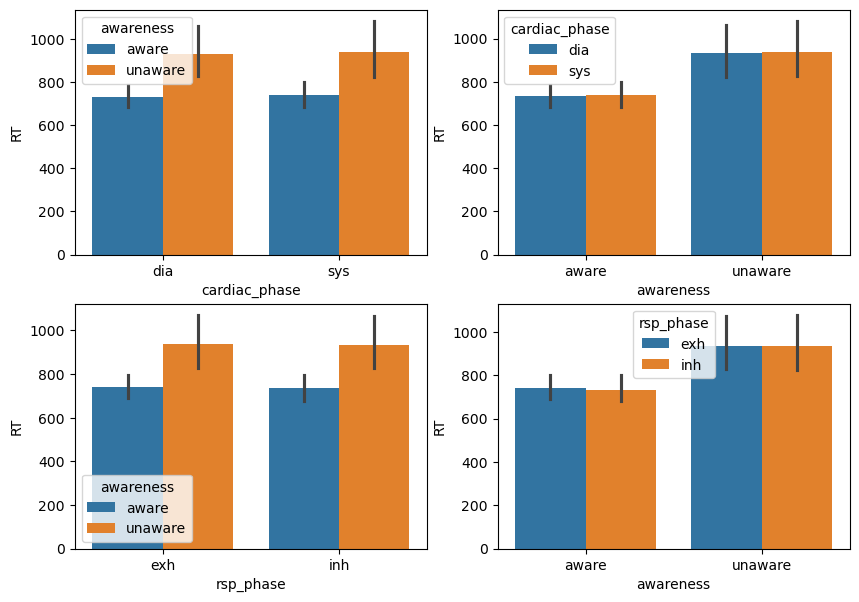

In [115]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,7))
sns.barplot(data=df_pivot_card,y='RT',x='cardiac_phase',hue='awareness',ax=ax1)
sns.barplot(data=df_pivot_card,y='RT',x='awareness',hue='cardiac_phase',ax=ax2)
sns.barplot(data=df_pivot_rsp,y='RT',x='rsp_phase',hue='awareness',ax=ax3)
sns.barplot(data=df_pivot_rsp,y='RT',x='awareness',hue='rsp_phase',ax=ax4)

In [114]:
pg.rm_anova(data=df_pivot_rsp,dv='RT',within=['rsp_phase','awareness'],subject='g_num')

/opt/anaconda3/envs/mne/lib/python3.12/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,rsp_phase,6.259029e+02,1,29,6.259029e+02,0.873539,0.357695,0.357695,0.000072,1.0
1,awareness,1.181552e+06,1,29,1.181552e+06,22.026659,0.000059,0.000059,0.119251,1.0
2,rsp_phase * awareness,1.405416e+02,1,29,1.405416e+02,0.240074,0.627839,0.627839,0.000016,1.0


In [17]:
pg.pairwise_tests(data=df_pivot_rsp,dv='RT',within=['rsp_phase','awareness'],subject='g_num')

,Contrast,rsp_phase,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,rsp_phase,-,exh,inh,True,True,1.303539,29.0,two-sided,2.026450e-01,0.419,0.070715
1,awareness,-,aware,unaware,True,True,-5.933951,29.0,two-sided,1.909509e-06,9695.27,-0.905781
2,rsp_phase * awareness,exh,aware,unaware,True,True,-5.083836,29.0,two-sided,2.009297e-05,1115.221,-0.862432
3,rsp_phase * awareness,inh,aware,unaware,True,True,-6.463918,29.0,two-sided,4.498530e-07,3.701e+04,-0.918588


In [18]:
pg.pairwise_tests(data=df_pivot_rsp,dv='RT',within=['awareness','rsp_phase'],subject='g_num')

,Contrast,awareness,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,awareness,-,aware,unaware,True,True,-5.933951,29.0,two-sided,0.000002,9695.27,-0.905781
1,rsp_phase,-,exh,inh,True,True,1.303539,29.0,two-sided,0.202645,0.419,0.070715
2,awareness * rsp_phase,aware,exh,inh,True,True,0.908613,29.0,two-sided,0.371044,0.284,0.119316
3,awareness * rsp_phase,unaware,exh,inh,True,True,1.016883,29.0,two-sided,0.317618,0.312,0.043734


<AxesSubplot:xlabel='awareness', ylabel='RT'>

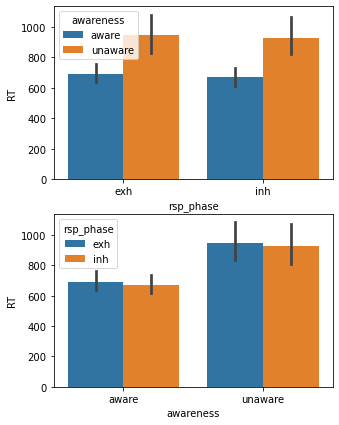

In [19]:
fig,[ax1,ax2]=plt.subplots(2,figsize=(5,7))
sns.barplot(data=df_pivot_rsp,y='RT',x='rsp_phase',hue='awareness',ax=ax1)
sns.barplot(data=df_pivot_rsp,y='RT',x='awareness',hue='rsp_phase',ax=ax2)

# Figure for article

In [136]:
dv='RT'
phy_phase='rsp_phase'
dict_awa_list={}

if phy_phase=='rsp_phase':
    pivot_tab=df_pivot_rsp.copy()
else:
    pivot_tab=df_pivot_card.copy()

for awa in pivot_tab['awareness'].unique():


    awa_df=pivot_tab[pivot_tab['awareness']==awa][[dv,phy_phase]]
    for card in pivot_tab[phy_phase].unique():
        awa_card=awa_df[awa_df[phy_phase]==card]
        mean_card_awa=awa_card[dv].mean()
        sem_card_awa=awa_card[dv].sem()
        dict_awa_list[f'{awa}_{card}']={'mean':mean_card_awa,'sem':sem_card_awa}
        #dict_awa_list.append(dict_awa)



In [137]:
%matplotlib qt
if phy_phase=='rsp_phase':
    color_list=['g','tab:pink','g','tab:pink']
    facecolor_list=['w','w','g','tab:pink']
    xticklab=['Aware', 'Unaware']
    xlab='Awareness'
    cond_list=['aware_inh','aware_exh','unaware_inh','unaware_exh']
else:
    color_list=['tab:orange','b','tab:orange','b']
    facecolor_list=['w','w','tab:orange','b']
    xticklab=['Aware', 'Unaware']
    xlab='Awareness'
    cond_list=['aware_sys','aware_dia','unaware_sys','unaware_dia']


hatch_list=['///','///','','']
adj_list=[0,-0.4,-0.45,-0.85]
#color_list=['tab:orange','tab:orange','b','b']
#facecolor_list=['w','tab:orange','w','b']

alpha_list=[1,0.6,1,0.6]
x=0
fig,ax=plt.subplots(figsize=(9,7))
for cond,color,hatch,adj,facecolor,alpha in zip(cond_list,color_list,hatch_list,adj_list,facecolor_list,alpha_list):


    ax.bar(x=x+adj,height=[dict_awa_list[cond]['mean']],facecolor=facecolor,yerr=[dict_awa_list[cond]['sem']],
            edgecolor=color,hatch=hatch,linewidth=2.5,capsize=(2),ecolor='0.3',
            width=0.5,label=cond.split('_')[0]+' '+cond.split('_')[1],alpha=alpha)
    x+=1



plt.xticks([0.3,1.85],labels=xticklab,size='x-large')
plt.xlabel(xlab,size='x-large')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.title('Interaction effect of cadiac and awaraness condition in the P1')
plt.legend(bbox_to_anchor=(1,1),fontsize='x-large')

fig=plt.gcf()


In [138]:
fig=plt.gcf()

In [135]:
os.getcwd()

'/Volumes/BBC/BBC/WP1/data/EEG/tsk'

In [139]:

fig.savefig(f'ana/results_report/images/barplots/tsk_o_RT_{phy_phase}.svg')